<a href="https://colab.research.google.com/github/alont01/Covert_Comm_ML/blob/main/covert_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# create m sets of sums of n gaussian distribution

import numpy as np
import random
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import math


mu=0
sigma=1
N=1000 #number of channel uses
M = 100 # number of training samples

Y0=[] # null where Alice does not transmit 
Y1=[] # where Alice transmits signal


thres_param= math.sqrt(N) #math.sqrt(N)
for m in range(M):
  y0=0
  y1=0
  for n in range(N):
    y0+=random.gauss(mu, sigma)**2
    y1+=random.gauss(mu, sigma)**2
    if (n%(N/thres_param)==0): # add every sqrt(N) times
      y1+=random.gauss(mu, sigma)**2
  Y0+=[y0]
  Y1+=[y1]

classes=[]
for y in Y0:
  classes+=[0]
for y in Y1:
  classes+=[1]




X=np.reshape(Y0+Y1, (20,1))
Y=np.array(classes)

print(X)
print(Y)
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X, Y)

# test set 
y0_test=0
y1_test=0
for n in range(N):
    y0_test+=random.gauss(mu, sigma)**2
    y1_test+=random.gauss(mu, sigma)**2
    if (n%(N/thres_param)==0): # add every N/thres_param times
      y1_test+=random.gauss(m, sigma)**2


print(svm_clf.predict([[y1_test]]))





[[ 96.54985   ]
 [ 83.92459378]
 [ 80.55463203]
 [ 54.37981648]
 [101.59337124]
 [102.52324656]
 [ 78.89429346]
 [121.07279429]
 [116.53986565]
 [102.02823892]
 [136.61536895]
 [ 85.89608118]
 [111.90103039]
 [137.03190495]
 [115.51461586]
 [ 93.69559314]
 [110.40685555]
 [102.9840045 ]
 [ 97.8545447 ]
 [126.04611821]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


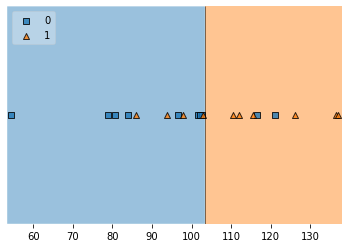

In [ ]:
### visualization

#plt.scatter(X, c=Y, s=50, cmap='autumn'))

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

#plt.scatter([0]*20, X, c=Y, s=50, cmap='autumn')


fig = plot_decision_regions(X=X, y=Y, clf=svm_clf, legend=2)

In [ ]:
#### tensorflow ######

import tensorflow as tf
import numpy as np
import random
print("TensorFlow version:", tf.__version__)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


mu=0
sigma=1
N=100 #number of channels 
M = 10 # number of training samples

Y0=[] # null where Alice does not transmit 
Y1=[] # where Alice transmits signal


thres_param= N #math.sqrt(N)
for m in range(M):
  y0=0
  y1=0
  for n in range(N):
    y0+=random.gauss(mu, sigma)**2
    y1+=random.gauss(mu, sigma)**2
    if (n%(N/thres_param)==0): # add every sqrt(N) times
      y1+=random.gauss(mu, sigma)**2
  Y0+=[y0]
  Y1+=[y1]

classes=[]
for y in Y0:
  classes+=[0]
for y in Y1:
  classes+=[1]




X=np.reshape(Y0+Y1, (20,1))
Y=np.array(classes)

print(X)
print(Y)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(X, Y, epochs=5)

# test set 
y0_test=0
y1_test=0
for n in range(N):
    y0_test+=random.gauss(mu, sigma)**2
    y1_test+=random.gauss(mu, sigma)**2
    if (n%(N/thres_param)==0): # add every N/thres_param times
      y1_test+=random.gauss(m, sigma)**2


print(svm_clf.predict([[y1_test]]))



TensorFlow version: 2.8.2
[[ 95.91502334]
 [ 79.51040049]
 [100.31134536]
 [111.41324841]
 [117.12291772]
 [ 81.5452881 ]
 [100.27251172]
 [124.35205429]
 [ 87.77816583]
 [ 90.4979917 ]
 [194.88565067]
 [180.85195913]
 [209.81304926]
 [199.27221718]
 [216.9399003 ]
 [196.82718831]
 [204.36833751]
 [197.75513036]
 [225.91505999]
 [190.03768643]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Epoch 1/5


ValueError: ignored